In [3]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


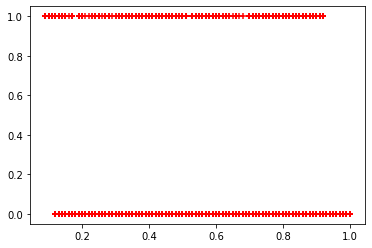

In [5]:
plt.scatter(df.satisfaction_level,df.left,marker="+",color="red")

<AxesSubplot:xlabel='salary'>

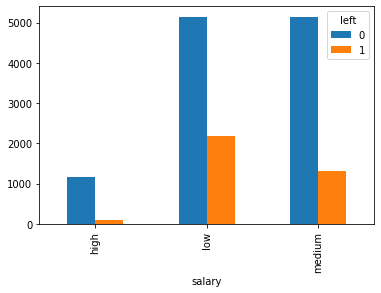

In [16]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

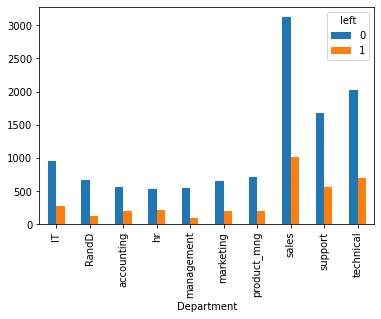

In [17]:

pd.crosstab(df.Department,df.left).plot(kind='bar')

<AxesSubplot:xlabel='average_montly_hours'>

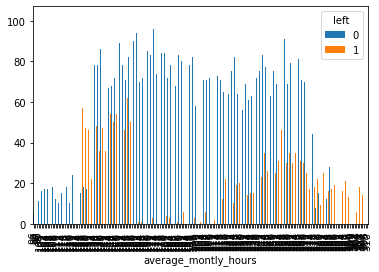

In [18]:
pd.crosstab(df.average_montly_hours,df.left).plot(kind='bar')

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df[['satisfaction_level']],df.left,train_size=0.9)

In [9]:
X_test

,satisfaction_level
14020,0.93
9096,0.83
3379,0.82
8028,0.50
66,0.43
...,...
5393,0.91
8309,0.97
6152,0.51
13211,0.49


In [10]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression()

model.fit(X_train,y_train)

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
model.score(X_test,y_test)

0.7753333333333333

In [ ]:
# NOW follow the other method..........

In [19]:

subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [20]:
salary_dummies=pd.get_dummies(subdf.salary,prefix="salary")

In [21]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [22]:

df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [23]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [25]:

X = df_with_dummies
y = df.left
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [27]:
new_model=LogisticRegression()

In [28]:
new_model.fit(X_train, y_train)

LogisticRegression()

In [30]:

new_model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
new_model.score(X_test,y_test)

0.7755238095238095